In [1]:
# Import Data and Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans

CRIM      per capita crime rate by town
ZN        proportion of residential land zoned for lots over 
             25,000 sq.ft.
INDUS     proportion of non-retail business acres per town
CHAS      Charles River dummy variable (= 1 if tract bounds 
             river; 0 otherwise)
NOX       nitric oxides concentration (parts per 10 million)
RM        average number of rooms per dwelling
AGE       proportion of owner-occupied units built prior to 1940
DIS       weighted distances to five Boston employment centres
RAD       index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
             by town
LSTAT    percent lower status of the population

In [2]:
def z_normalize(X):
    """
    Compute z-normalized data matrix.
    :Input:     X: An n-by-d numpy array representing n points in R^d
    :Output:    X: An n-by-d numpy array representing n points in R^d that have been z-normalized.
    """
    mu = X.mean(0)
    sg = X.std(0)

    X = (X - mu) / sg
    return X

In [3]:
# Fetch the data from sklearn.
databunch = load_boston()

X = databunch.data
feature_names = databunch.feature_names

Xn = z_normalize(X)

In [74]:
def show_2D_clusters(X, c, d1, d2, **kwargs):
    """
    Visualize the different clusters using color encoding.
    :Input:     X:  An n-by-d numpy array representing n points in R^d
                c:  A list (or numpy array) of n elements. The ith entry, c[i], must be an 
                    integer representing the index of the cluster that point i belongs to.
                d1: y dimension in plot  
                d2: x dimension in plot  
                t:  title of plot
    """
    plt.figure()
    plt.scatter(X[:, d1], X[:, d2], c=c)
    
    if 't' in kwargs:
        plt.title(kwargs['t'])
    else:
        plt.xlabel(feature_names[d1])
        plt.ylabel(feature_names[d2])
        
    plt.show()

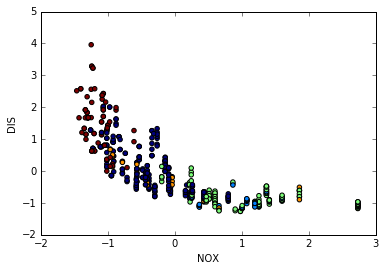

In [70]:
# Do kmeans
nclusters = 5
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(Xn)
show_2D_clusters(Xn, kmeans.labels_, 4, 7)

Some of the clusters speparate better than others. This view separates red, dark blue, and green relatively well but does not help us group yellow or sky blue. 

This view also does not really tell us much about what the clusters represent. We do see an expected correlation between weighted distances to five Boston employment centres and nitric oxides concentration. From this context we can conclude the red cluster might indicate suburban properties, while the green cluster may represent urban appartments, while blue sits somewhere in the middle.

In [81]:
def svd(X):
    """
    Compute Singular Value Decomposition of data matrix
    :Input:     X: An n-by-d numpy array representing n points in R^d
    :Output:    u: Singular Vectors
                s: Singular Values st s(1) corresponds to u(1)
                v: Orthagonal projection back to data space
    """
    N = X.shape[0]
    sigma_matrix = np.dot(X.T, X) / N
    u,s,v = np.linalg.svd(sigma_matrix)
    v = np.real(v)
 
    # Sort
    #idx = s.argsort()[::-1]
    #s = s[idx]
    #u = u[:,idx]

    return u,s,v

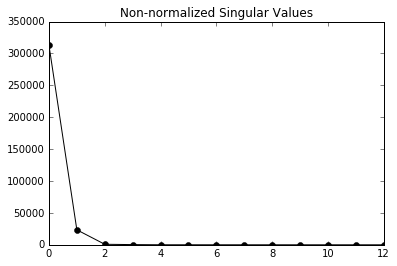

In [82]:
u,s,v = svd(X)
plt.plot(s, 'ko-')
plt.title("Non-normalized Singular Values")
plt.show()

Resulting from some numerical instability in the non-normalized data we see that the majority of the varience in our data can be captured in two dimensions. Let's take a look at the composition of the first two principle components and then project our data onto them and look at our clusters.

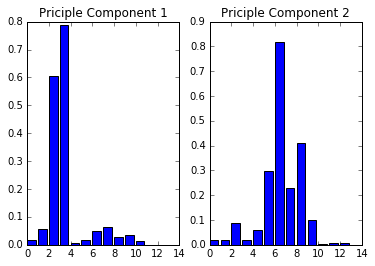

In [83]:
u,s,v = svd(X)
plt.subplot(1, 2, 1)
plt.bar(range(len(u[1])), np.absolute(u[1]))
plt.title("Priciple Component 1")

plt.subplot(1, 2, 2)
plt.bar(range(len(u[1])), np.absolute(u[2]))
plt.title("Priciple Component 2")
plt.show()

We can conclude that our principle singular vector is primarily a linear combination of proportion of non-retail business acres per town and the Charles River dummy variable. And that our second singular vector is a combination of proportion of owner-occupied units built prior to 1940, index of accessibility to radial highways, and average number of rooms per dwelling.

In [87]:
def project_reduced_dim(X, v, dprime):
    c = np.dot(X, v)
    reduced_X = np.dot(c[:, :dprime], v[:, :dprime].T)
    return reduced_X

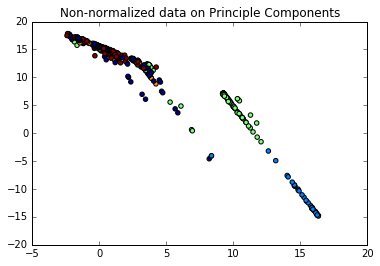

In [88]:
u,s,v = svd(X)
X2 = project_reduced_dim(X, u, 2)
show_2D_clusters(X2, kmeans.labels_, 0, 1, t="Non-normalized data on Principle Components")

The clusters are not obvious the principle components of the non-normalized data does not capture the difference between the red and dark blue clusters and no differentiation of the yellow cluster.

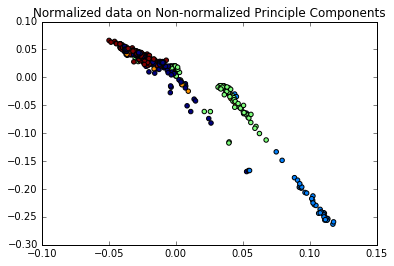

In [91]:
u,s,v = svd(X)
Xn2 = project_reduced_dim(Xn, u, 2)
show_2D_clusters(Xn2, kmeans.labels_, 0, 1, t="Normalized data on Non-normalized Principle Components")

The clustering is only marginally better when the normalized data is projected on to the principle components. Let's try the same approach for our normalized data.

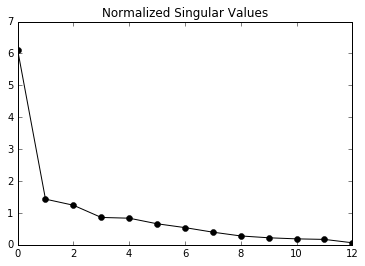

In [92]:
u,s,v = svd(Xn)
plt.plot(s, 'ko-')
plt.title("Normalized Singular Values")
plt.show()

Due to the number of components necessary to capture the varience of our normalized data my intuition is this exercise is not going to be as useful as it was for our non-normalized data.

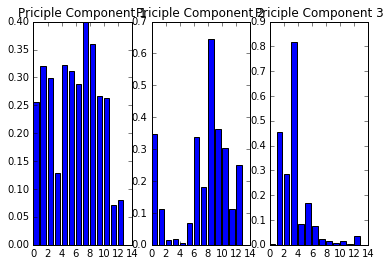

In [97]:
u,s,v = svd(Xn)
plt.subplot(1, 3, 1)
plt.bar(range(len(u[1])), np.absolute(u[1]))
plt.title("Priciple Component 1")

plt.subplot(1, 3, 2)
plt.bar(range(len(u[2])), np.absolute(u[2]))
plt.title("Priciple Component 2")

plt.subplot(1, 3, 3)
plt.bar(range(len(u[3])), np.absolute(u[3]))
plt.title("Priciple Component 3")
plt.show()

The fact that our priciple component is basically a linear combination of all the dimensions of our data confirms my pessimistic guess. Let's use brute force go gain a intuition about what is happening!

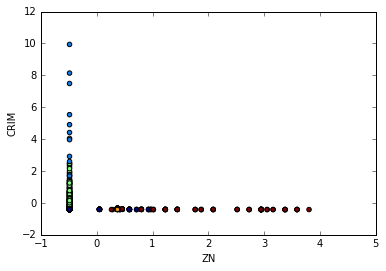

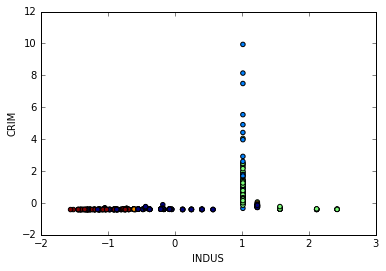

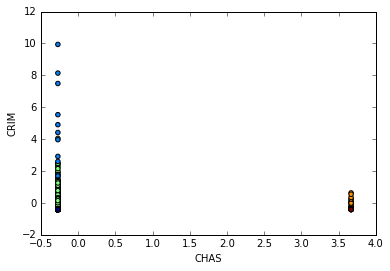

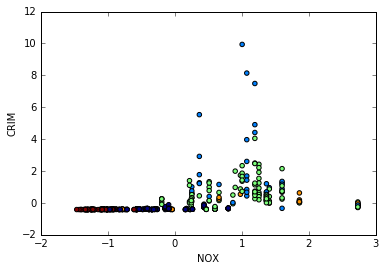

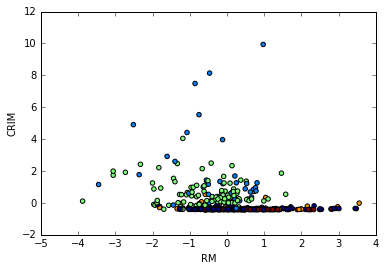

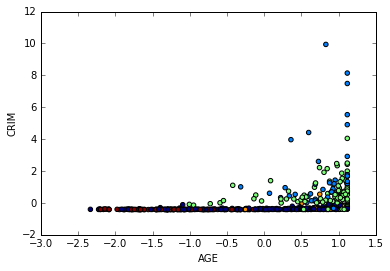

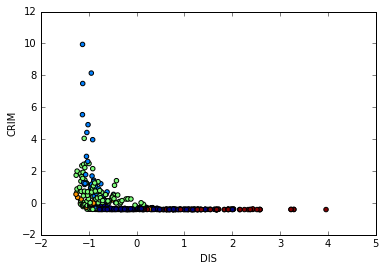

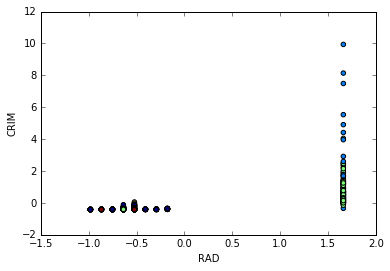

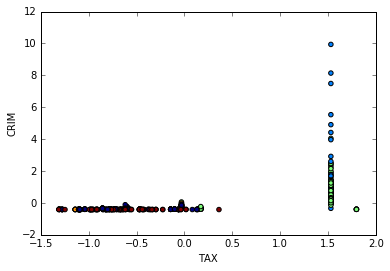

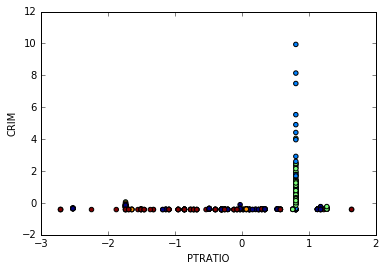

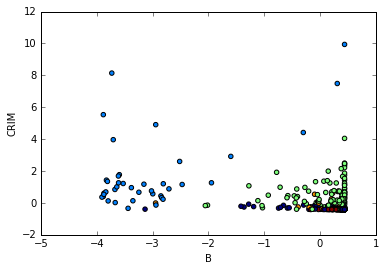

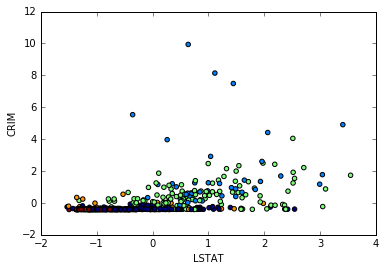

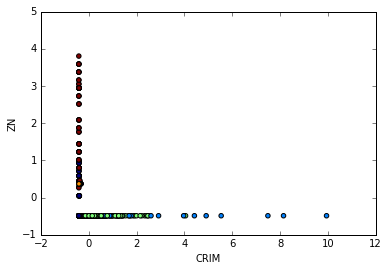

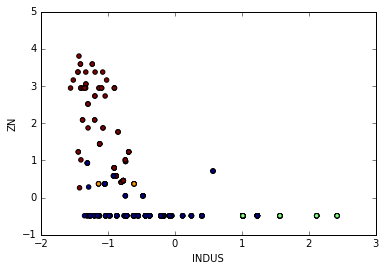

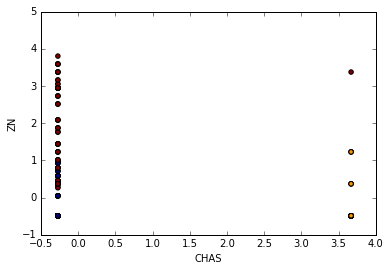

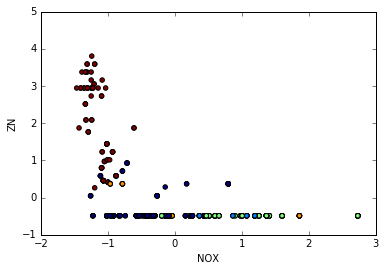

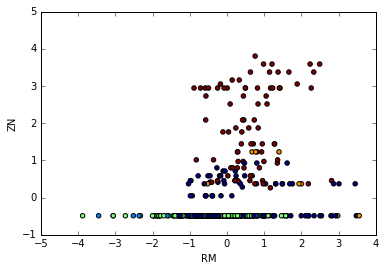

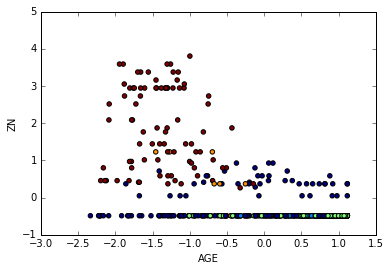

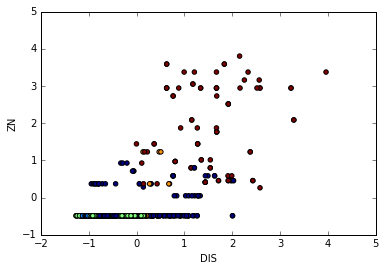

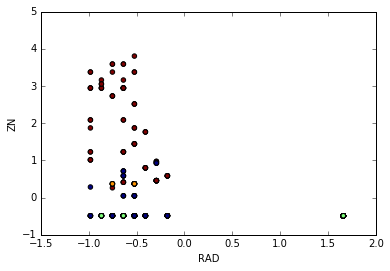

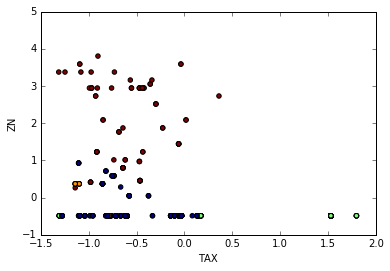

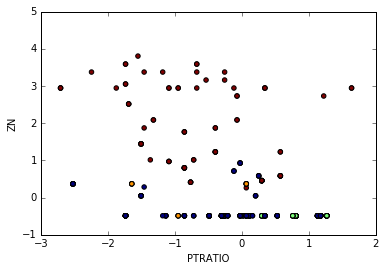

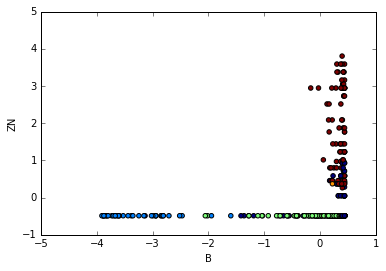

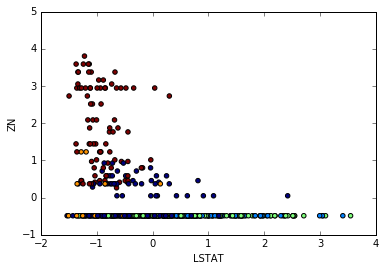

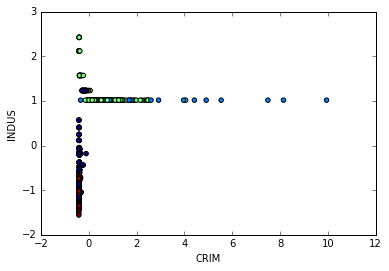

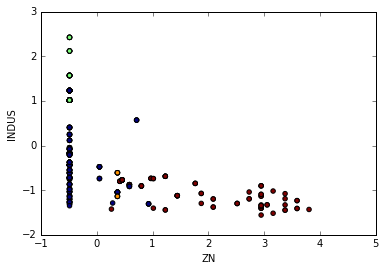

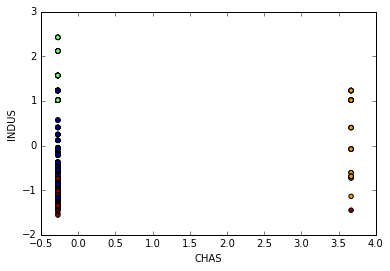

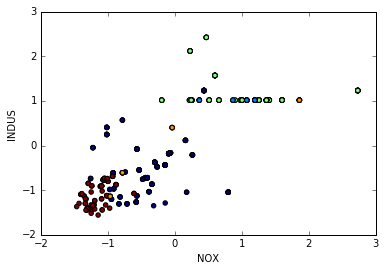

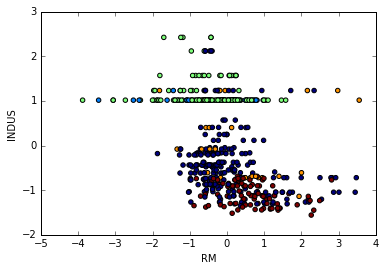

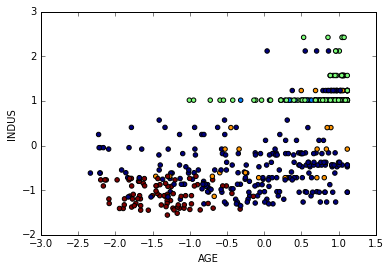

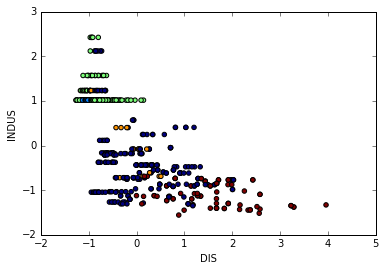

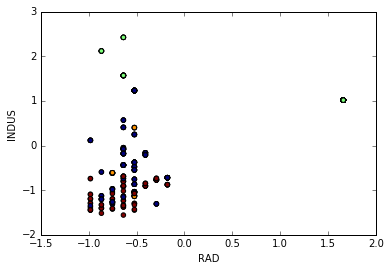

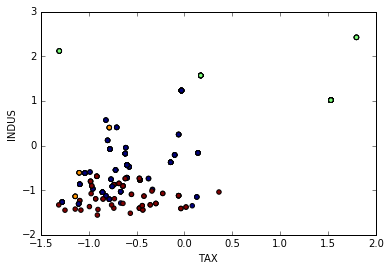

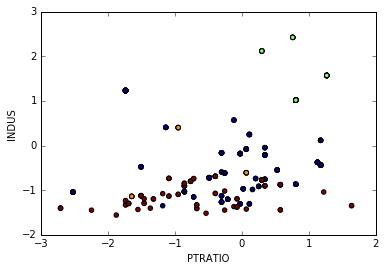

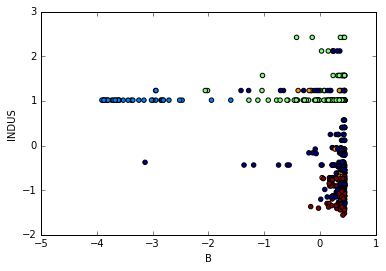

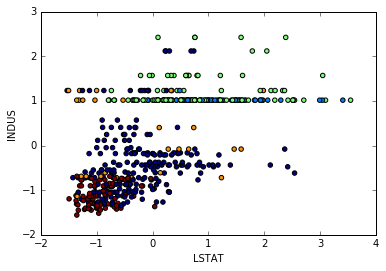

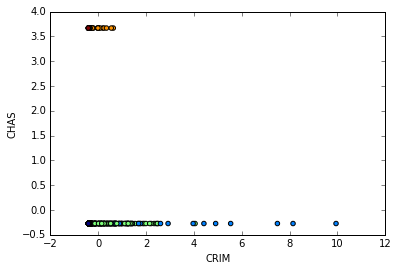

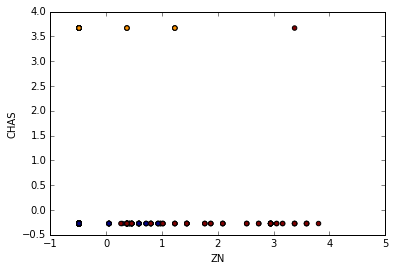

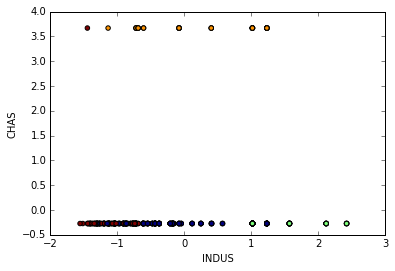

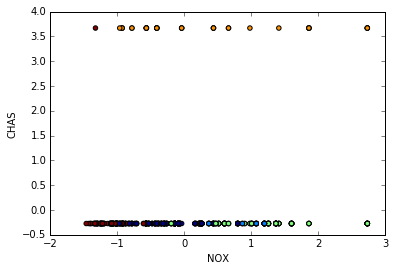

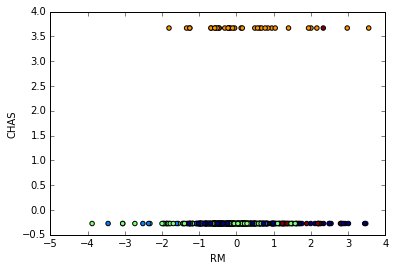

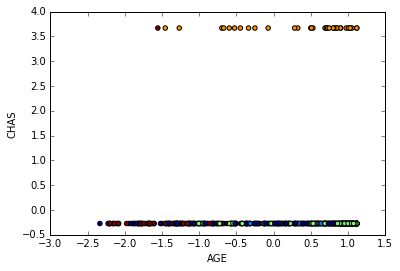

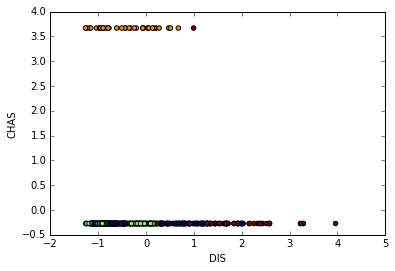

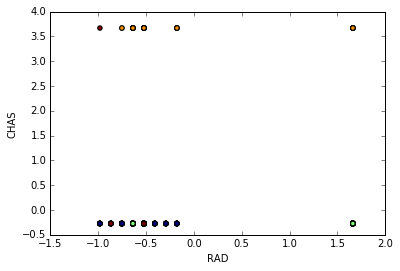

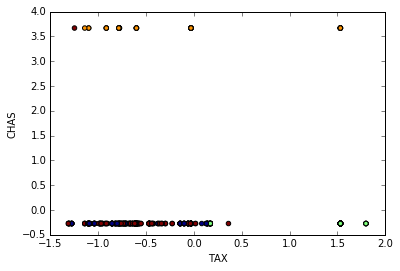

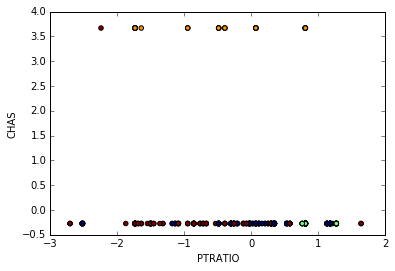

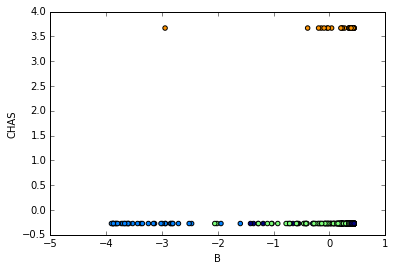

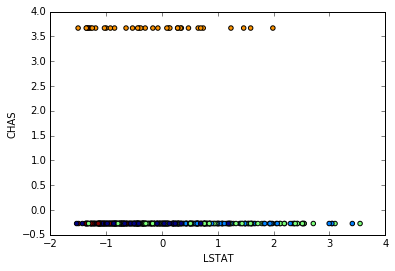

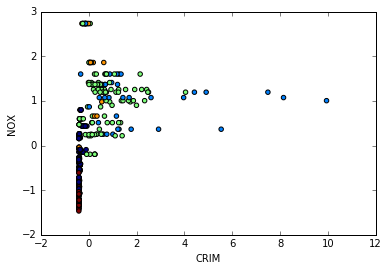

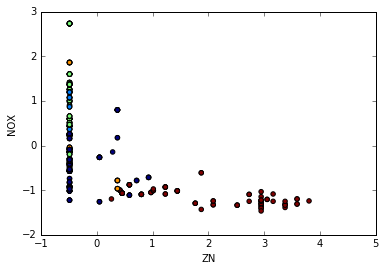

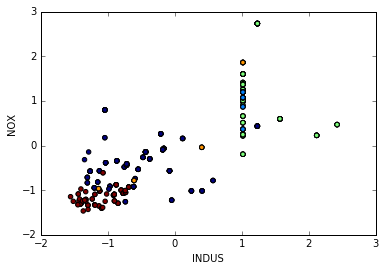

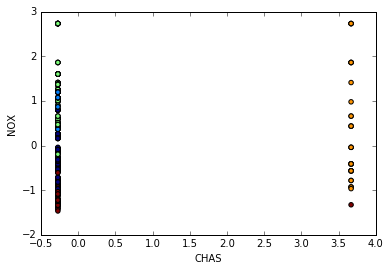

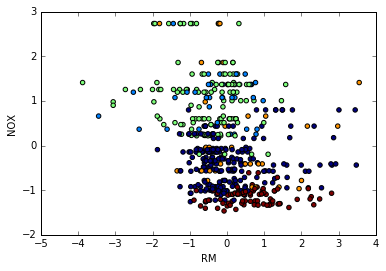

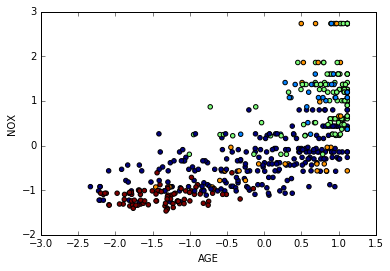

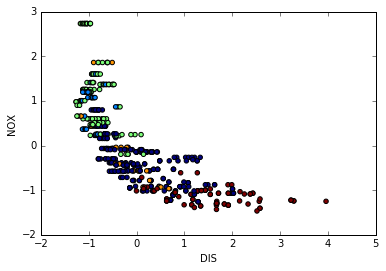

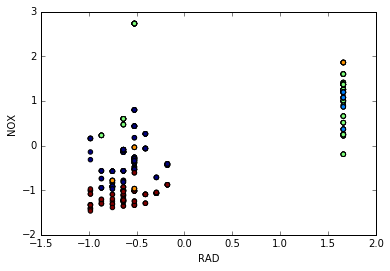

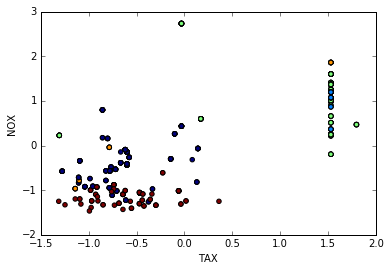

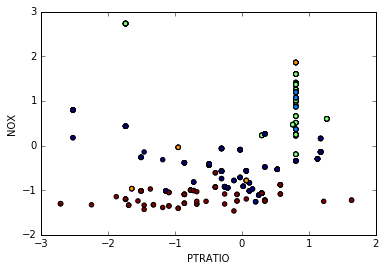

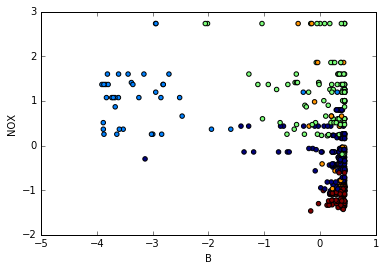

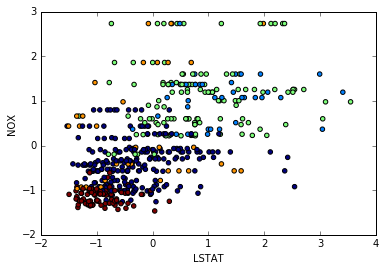

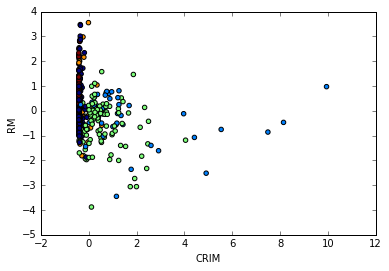

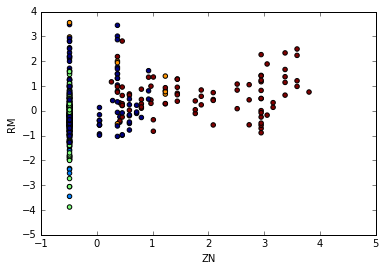

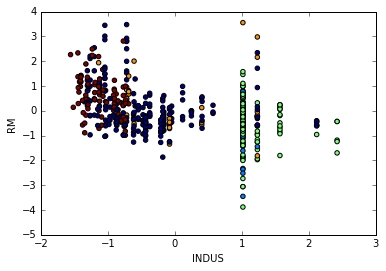

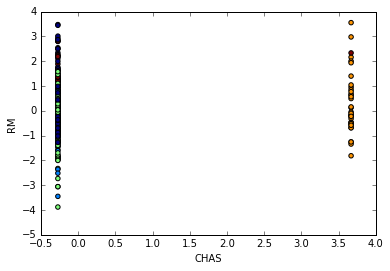

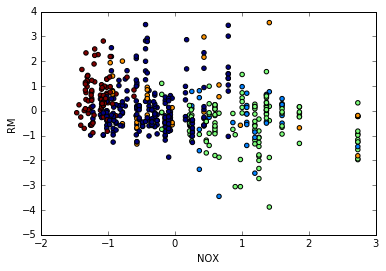

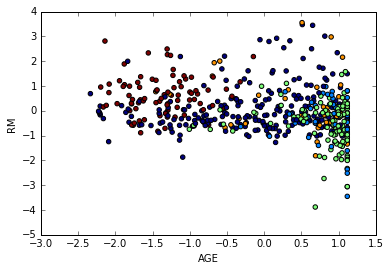

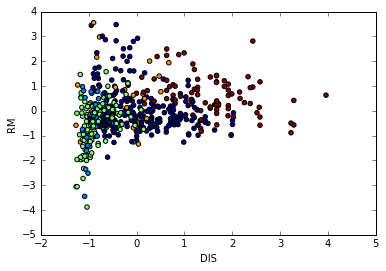

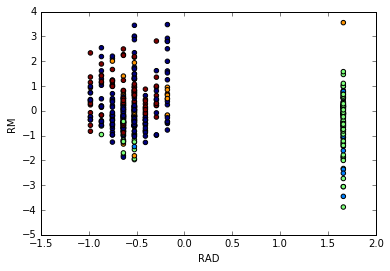

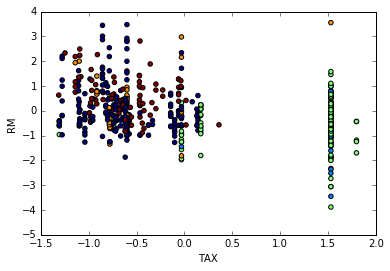

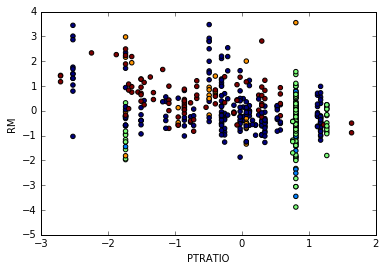

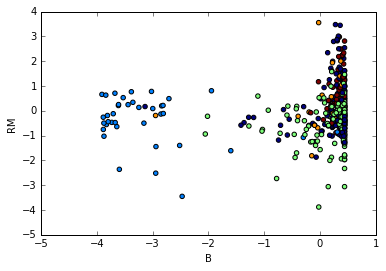

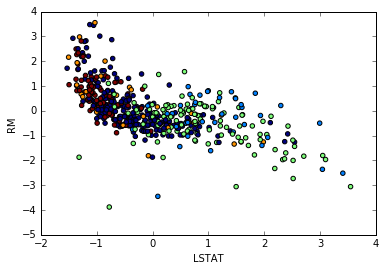

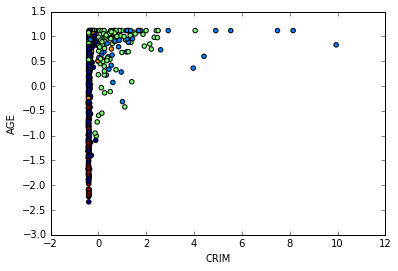

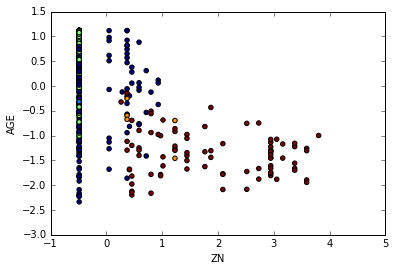

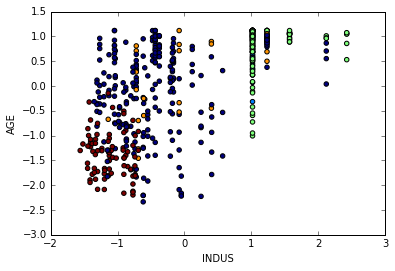

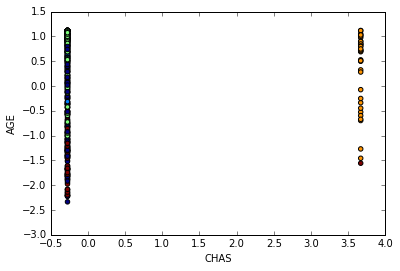

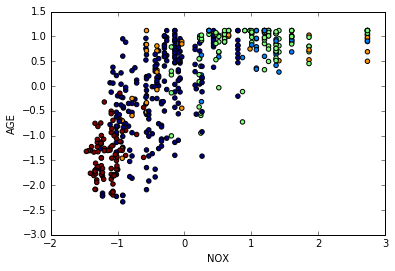

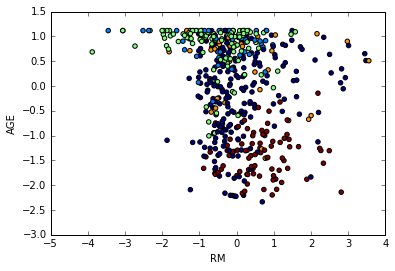

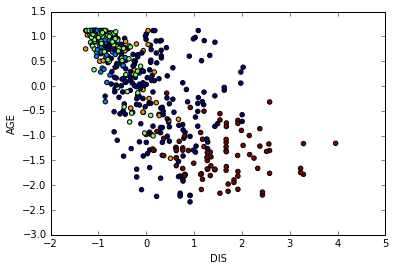

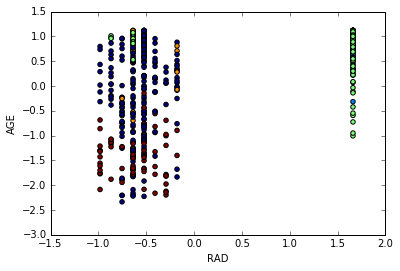

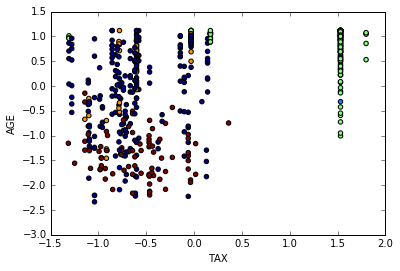

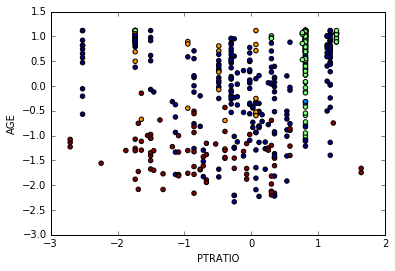

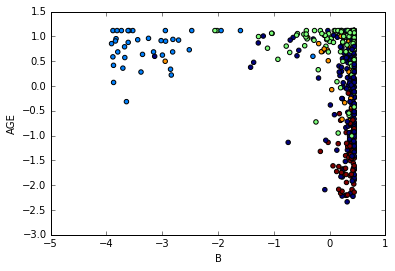

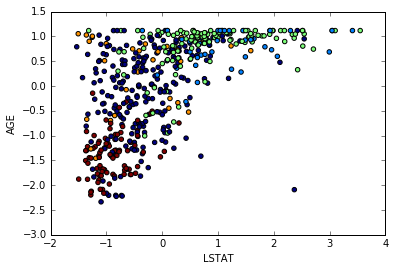

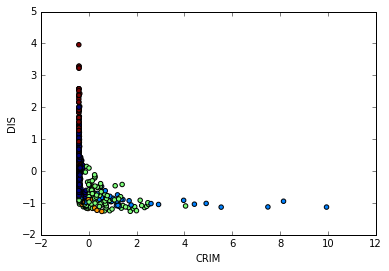

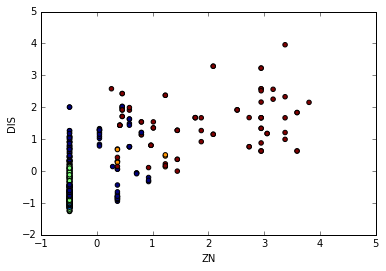

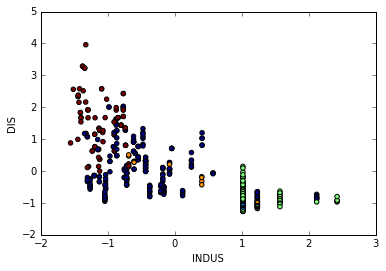

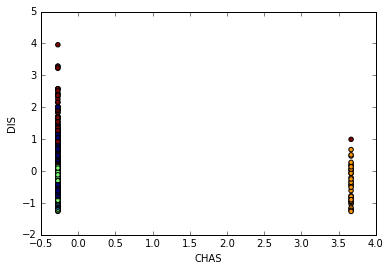

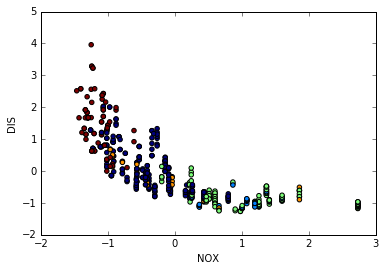

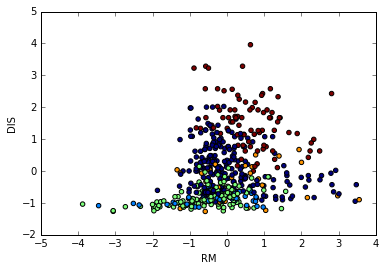

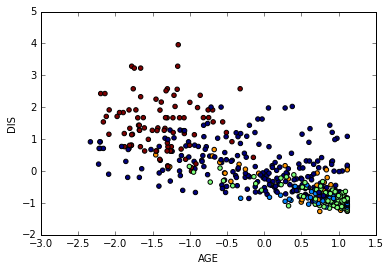

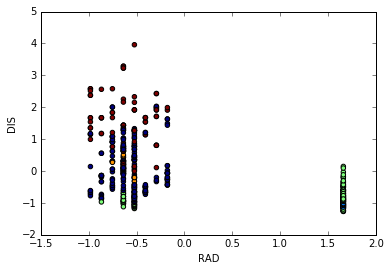

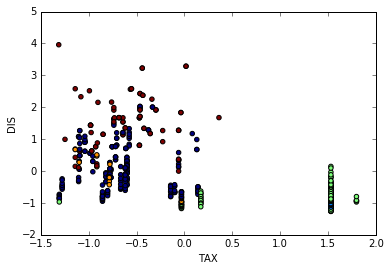

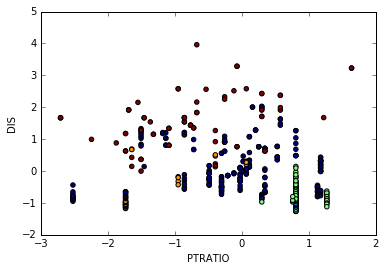

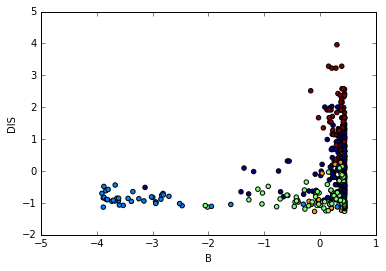

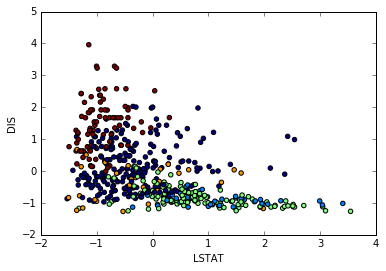

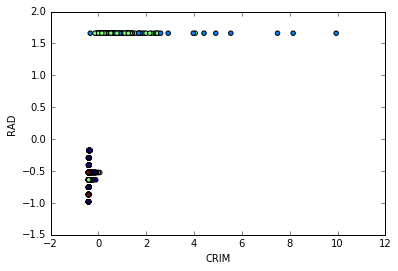

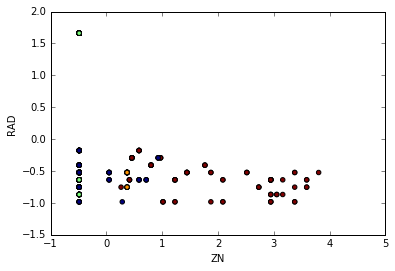

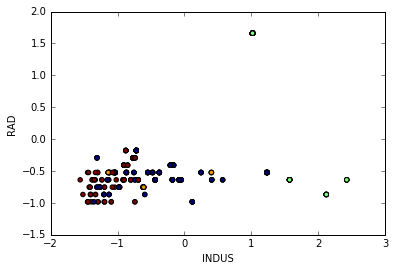

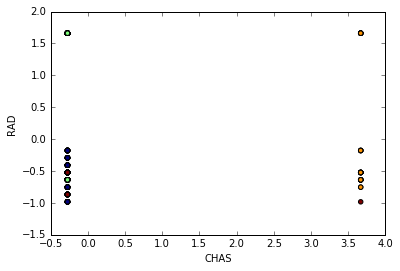

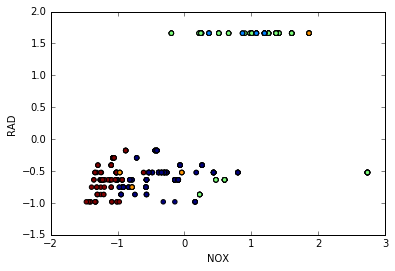

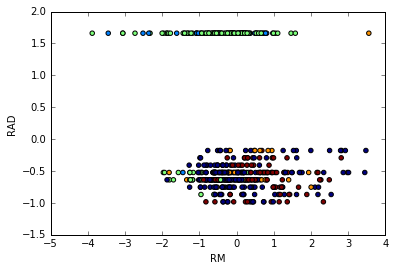

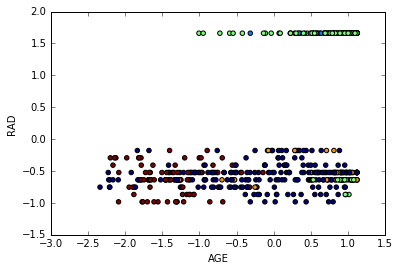

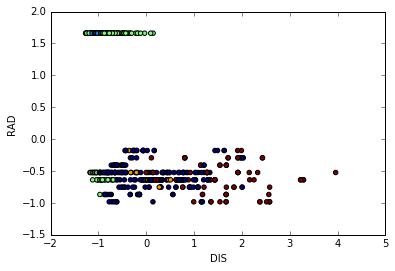

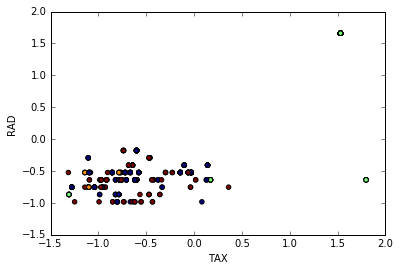

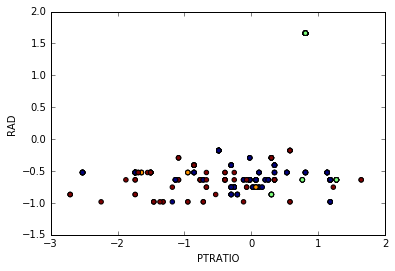

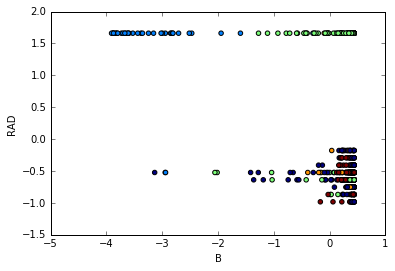

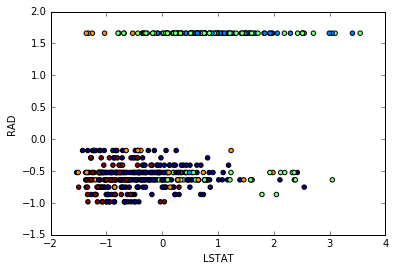

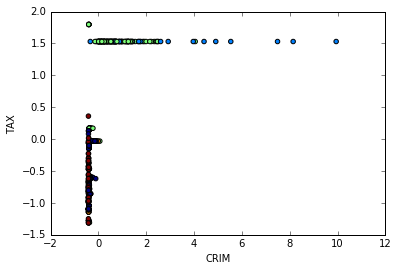

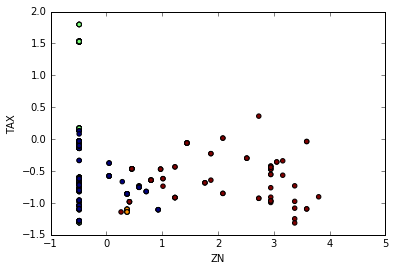

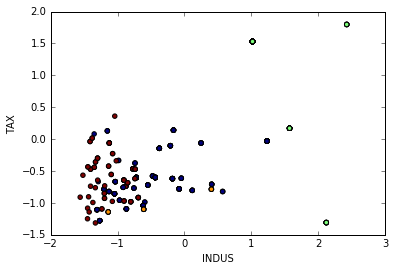

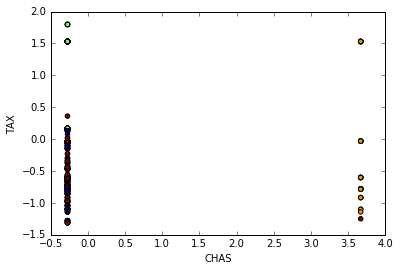

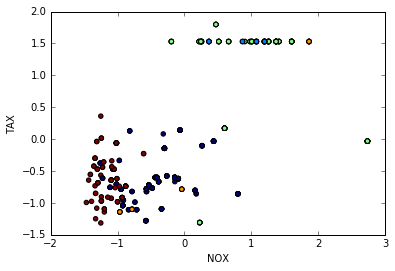

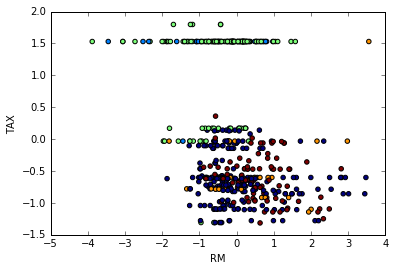

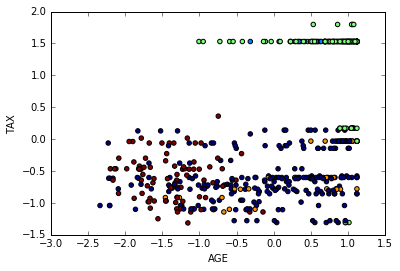

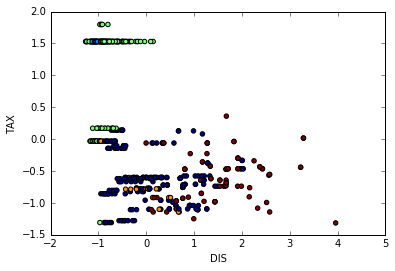

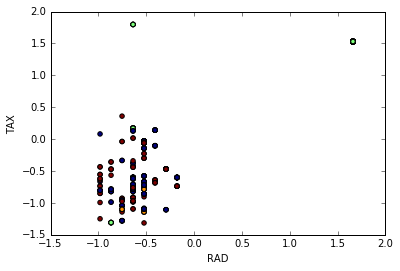

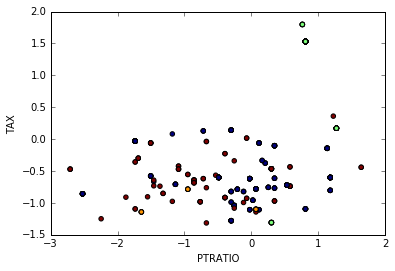

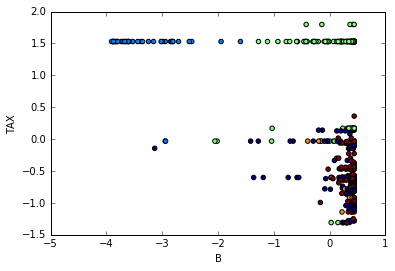

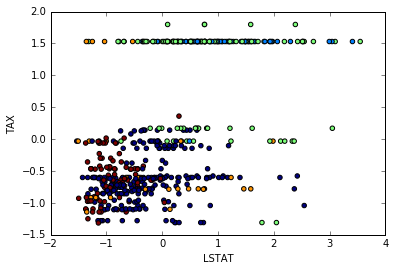

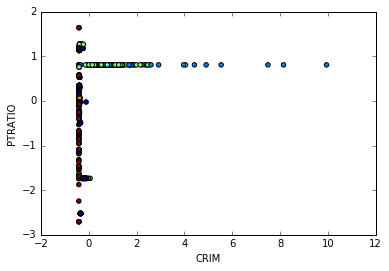

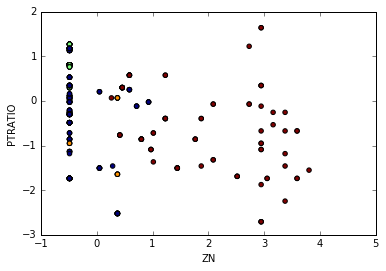

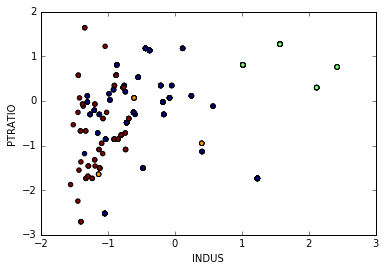

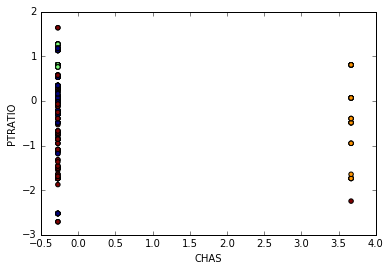

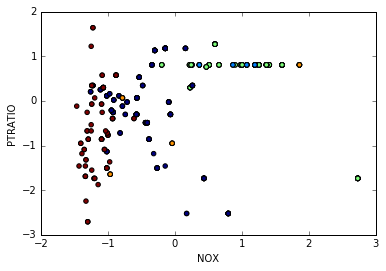

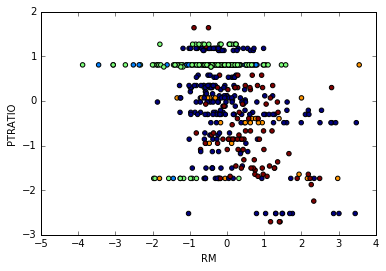

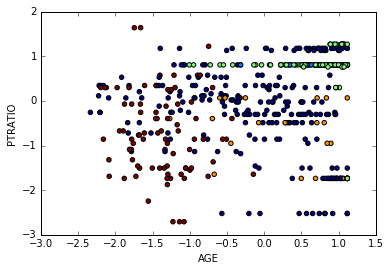

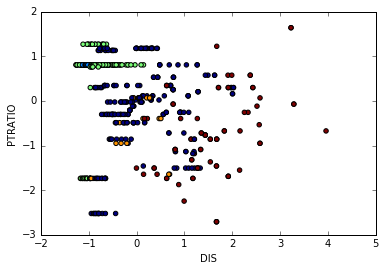

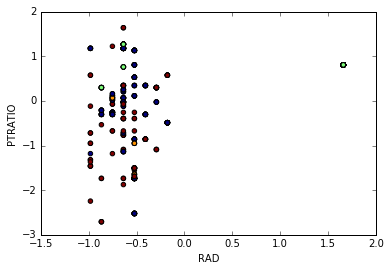

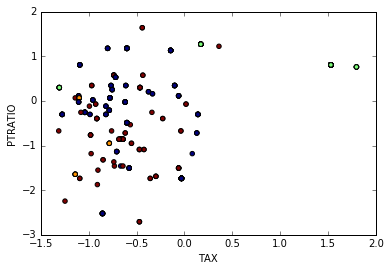

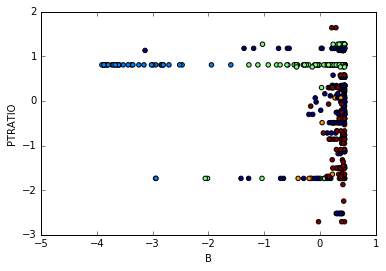

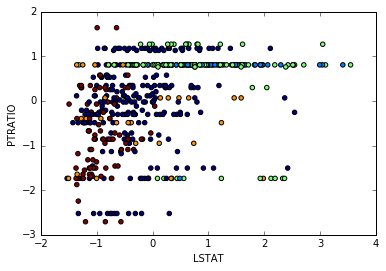

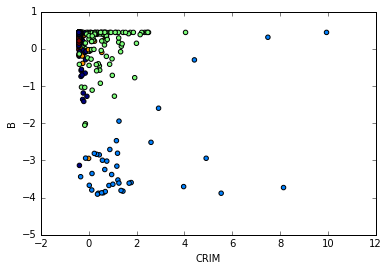

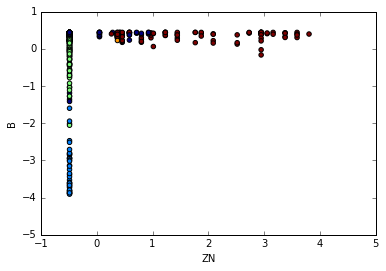

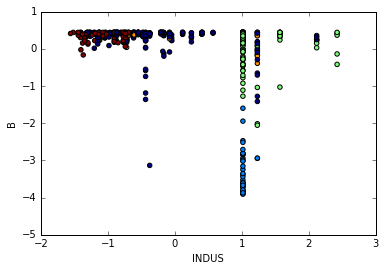

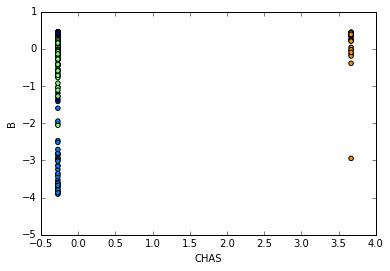

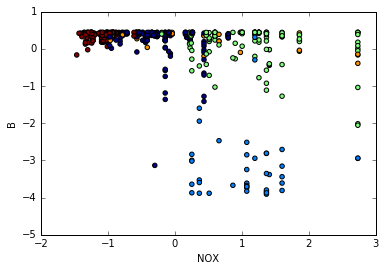

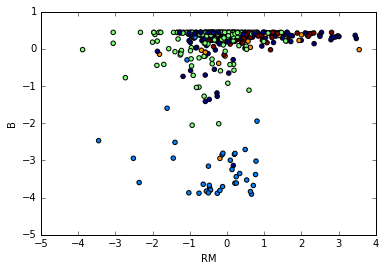

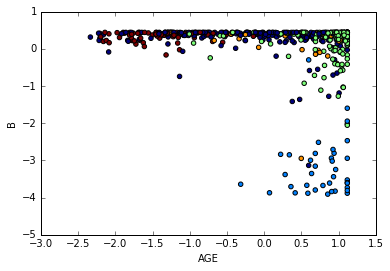

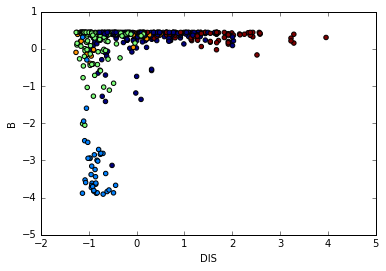

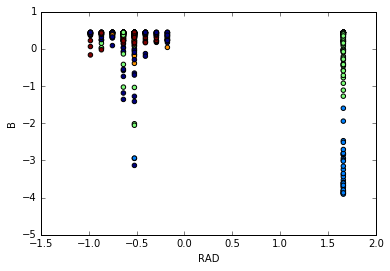

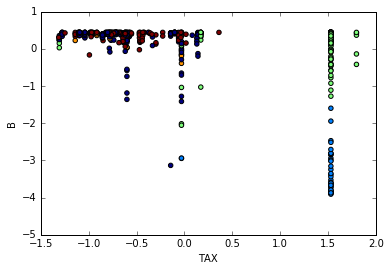

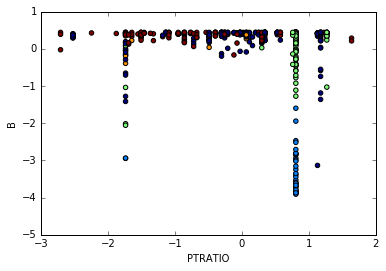

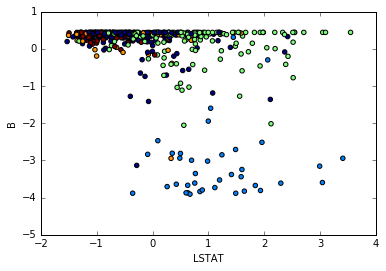

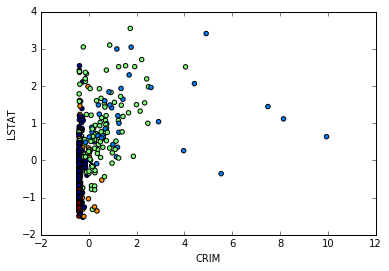

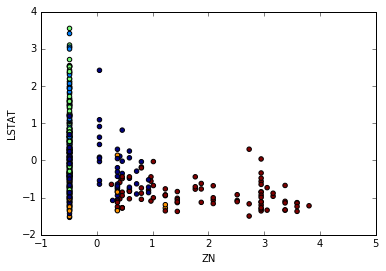

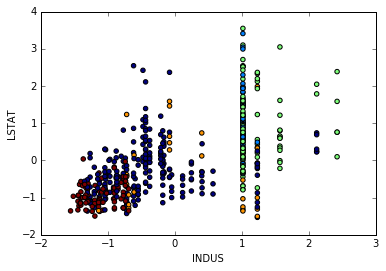

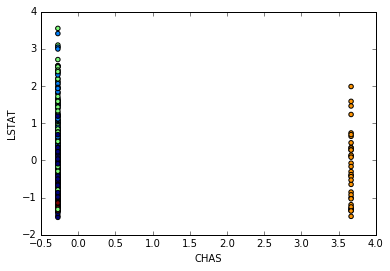

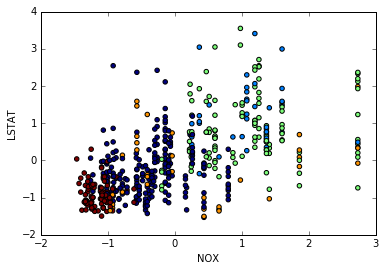

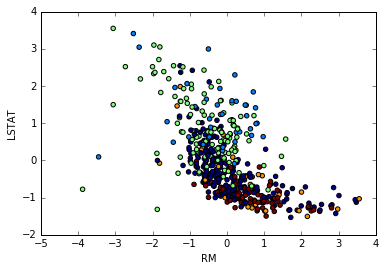

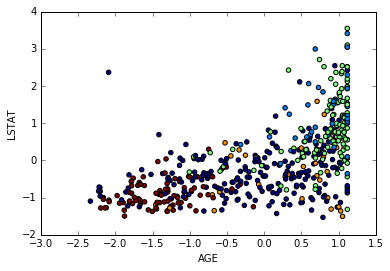

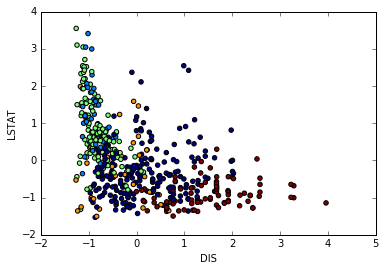

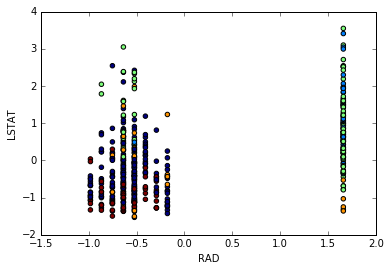

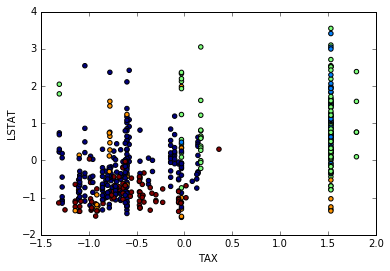

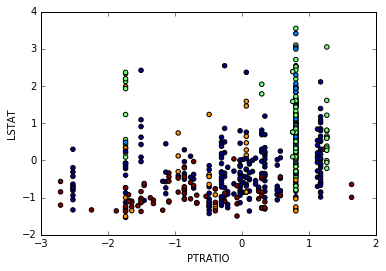

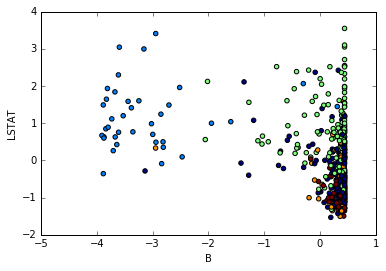

In [101]:
for j in range(Xn.shape[1]):
    for i in range(Xn.shape[1]):
        if i != j:
            show_2D_clusters(Xn, kmeans.labels_, i, j)

General intuitions after enumeration all 2D views:
1. The light blue cluster represents properties in black majority comunities, they tend to be closer to urban centers and have higher crime rates.
2. The yellow cluster represents properties on the Charles River.
3. kMeans does not handel normalized binary indicator data very fluidly
4. ZN separates red from dark blue strengthening my intution that the red cluster indicates suburban properties like those in andover or boxford while the dark blue cluster represents intermediate properties like those in somerville or medford.
5. CRIM and DIS and our understanding that light blue is a racial indicator leads us to believe that light blue and green clusters are both urban comunities typically very close to one another.

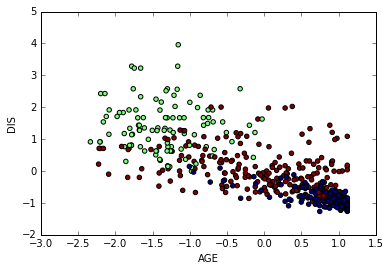

In [118]:
# Do kmeans
nclusters = 3
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(Xn)
show_2D_clusters(Xn, kmeans.labels_, 6, 7)

Since kMeans is not handling the Charles River indicator variable in a way that I feel is meaningful and I don't really care about the race of my neighbors we reduce our number of clusters to 3 and see that we can project onto a space that speparates suburban, urban, and in-between properties and has a nice correlation representing people moving away of urban centers as they age!